<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/Copy_of_TimesArrowReversed002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

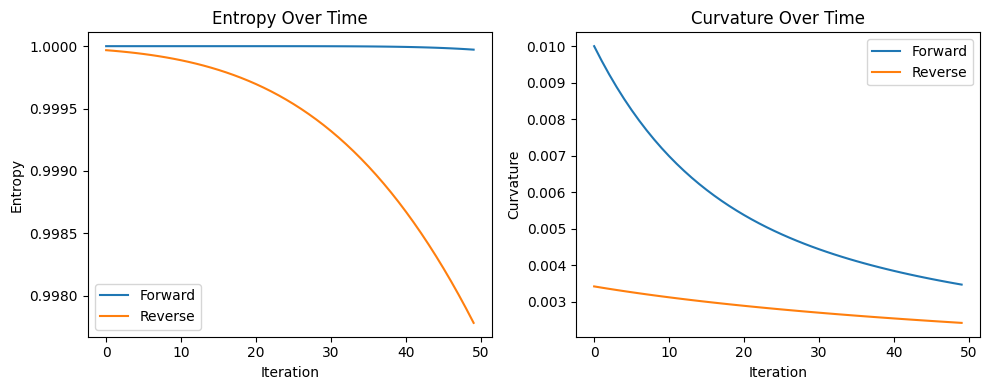

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
size = 20
iterations = 50

# Initialize lattice: entropy, memory, curvature
entropy = np.zeros((size, size))
memory = np.ones((size, size))
curvature = np.zeros((size, size))

# Inject entropy spike at center
center = size // 2
entropy[center, center] = 1.0

# Lists to track forward evolution
total_entropy = []
average_curvature = []

# Forward evolution loop
for t in range(iterations):
    new_entropy = entropy.copy()
    new_memory = memory.copy()
    new_curvature = curvature.copy()

    for i in range(1, size-1):
        for j in range(1, size-1):
            # Entropy diffusion
            neighbors = entropy[i-1:i+2, j-1:j+2]
            flux = np.mean(neighbors) - entropy[i, j]
            new_entropy[i, j] += 0.1 * flux

            # Memory decay
            new_memory[i, j] *= 0.99

            # Curvature proxy
            grad_x = entropy[i+1, j] - entropy[i-1, j]
            grad_y = entropy[i, j+1] - entropy[i, j-1]
            new_curvature[i, j] = np.sqrt(grad_x**2 + grad_y**2)

    entropy = new_entropy
    memory = new_memory
    curvature = new_curvature

    total_entropy.append(np.sum(entropy))
    average_curvature.append(np.mean(curvature))

# Store final forward states
forward_entropy = entropy.copy()
forward_curvature = curvature.copy()

# Reverse evolution setup
reverse_entropy = forward_entropy.copy()
reverse_curvature = forward_curvature.copy()

reverse_entropy_list = []
reverse_curvature_list = []

# Reverse evolution loop
for t in range(iterations):
    new_entropy = reverse_entropy.copy()
    new_curvature = reverse_curvature.copy()

    for i in range(1, size-1):
        for j in range(1, size-1):
            # Reverse entropy diffusion (naive inversion)
            neighbors = reverse_entropy[i-1:i+2, j-1:j+2]
            flux = reverse_entropy[i, j] - np.mean(neighbors)
            new_entropy[i, j] -= 0.1 * flux

            # Attempt to reverse memory decay
            memory[i, j] /= 0.99

            # Curvature proxy
            grad_x = new_entropy[i+1, j] - new_entropy[i-1, j]
            grad_y = new_entropy[i, j+1] - new_entropy[i, j-1]
            new_curvature[i, j] = np.sqrt(grad_x**2 + grad_y**2)

    reverse_entropy = new_entropy
    reverse_curvature = new_curvature

    reverse_entropy_list.append(np.sum(reverse_entropy))
    reverse_curvature_list.append(np.mean(reverse_curvature))

# Plotting forward vs reverse
plt.figure(figsize=(10,4))

# Entropy comparison
plt.subplot(1,2,1)
plt.plot(total_entropy, label='Forward')
plt.plot(reverse_entropy_list, label='Reverse')
plt.title("Entropy Over Time")
plt.xlabel("Iteration")
plt.ylabel("Entropy")
plt.legend()

# Curvature comparison
plt.subplot(1,2,2)
plt.plot(average_curvature, label='Forward')
plt.plot(reverse_curvature_list, label='Reverse')
plt.title("Curvature Over Time")
plt.xlabel("Iteration")
plt.ylabel("Curvature")
plt.legend()

plt.tight_layout()
plt.show()
